In [1]:
import f3dasm

In [2]:
seed = 42

### Creating the design space

Define the parameters `x1`, `x2` and `x3` and the output `y`

In [3]:
# Input parameters
x1 = f3dasm.ContinuousParameter(name="x1", lower_bound=0., upper_bound=1.)
x2 = f3dasm.ContinuousParameter(name="x2", lower_bound=0., upper_bound=1.)
x3 = f3dasm.ContinuousParameter(name="x3", lower_bound=0., upper_bound=1.)

# Output parameters
y = f3dasm.ContinuousParameter(name="y")

We construct 2 lists of these parameters and construct the designspace: 

In [4]:
# Creaete lists of parameters
input_space = [x1, x2, x3]
output_space = [y]

# Construct the design space
design = f3dasm.DesignSpace(input_space=input_space, output_space=output_space)

To sample from the design space, we need a sampler. We choose the default `RandomUniform` sampler:

In [5]:
# Construct sampler
random_uniform = f3dasm.sampling.RandomUniformSampling(doe=design, seed=seed)

By invoking the `get_samples()` method, we obtain samples according to the sampling strategy:

In [6]:
N = 20 # Number of samples

data = random_uniform.get_samples(numsamples=N)

### Initializing the `Data` object

We can plot two dimensions of the samples with the `plot()` method:

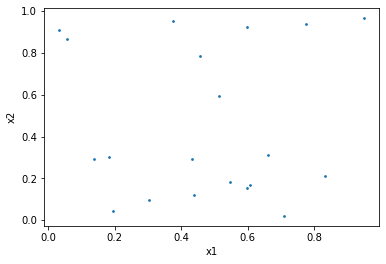

In [7]:
data.plot(input_par1='x1', input_par2='x2')

The data can be displayed with the `show()` method

In [8]:
data.show()

       input                     output
          x1        x2        x3      y
0   0.374540  0.950714  0.731994    NaN
1   0.598658  0.156019  0.155995    NaN
2   0.058084  0.866176  0.601115    NaN
3   0.708073  0.020584  0.969910    NaN
4   0.832443  0.212339  0.181825    NaN
5   0.183405  0.304242  0.524756    NaN
6   0.431945  0.291229  0.611853    NaN
7   0.139494  0.292145  0.366362    NaN
8   0.456070  0.785176  0.199674    NaN
9   0.514234  0.592415  0.046450    NaN
10  0.607545  0.170524  0.065052    NaN
11  0.948886  0.965632  0.808397    NaN
12  0.304614  0.097672  0.684233    NaN
13  0.440152  0.122038  0.495177    NaN
14  0.034389  0.909320  0.258780    NaN
15  0.662522  0.311711  0.520068    NaN
16  0.546710  0.184854  0.969585    NaN
17  0.775133  0.939499  0.894827    NaN
18  0.597900  0.921874  0.088493    NaN
19  0.195983  0.045227  0.325330    NaN


### Evaluating a benchmark function

Several benchmark function have been implemented to work with **continuous and single-objective** optimization problems.

The `Levy()` function is a well-known, multimodal function


In [9]:
func = f3dasm.functions.Levy(seed=seed, scale_bounds=[-10., 10.])

We can plot a three-dimensional represtation of two input parameters $X_1$ and $X_2$ with the `plot()` function

(<Figure size 504x504 with 1 Axes>,
 <Axes3DSubplot:xlabel='$X_{1}$', ylabel='$X_{2}$'>)

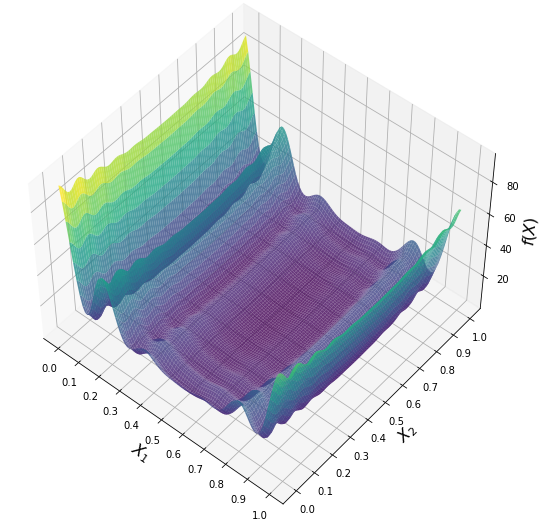

In [10]:
func.plot(px=100, domain=[0.,1.])

Evaluating the function is easy, just pass either the `Data()` object to it and all the samples will be evaluated or a `np.ndarray`
The output will be a `np.ndarray`

In [11]:
x = data.get_input_data().to_numpy()

### Add the function evaluations back to the data structure

By calling the `add_output` option, we can add individual columns or overwrite data to our DataFrame:

In [12]:
data.add_output(output=y, label='y')

In [13]:
data.show()

       input                      \
          x1        x2        x3   
0   0.374540  0.950714  0.731994   
1   0.598658  0.156019  0.155995   
2   0.058084  0.866176  0.601115   
3   0.708073  0.020584  0.969910   
4   0.832443  0.212339  0.181825   
5   0.183405  0.304242  0.524756   
6   0.431945  0.291229  0.611853   
7   0.139494  0.292145  0.366362   
8   0.456070  0.785176  0.199674   
9   0.514234  0.592415  0.046450   
10  0.607545  0.170524  0.065052   
11  0.948886  0.965632  0.808397   
12  0.304614  0.097672  0.684233   
13  0.440152  0.122038  0.495177   
14  0.034389  0.909320  0.258780   
15  0.662522  0.311711  0.520068   
16  0.546710  0.184854  0.969585   
17  0.775133  0.939499  0.894827   
18  0.597900  0.921874  0.088493   
19  0.195983  0.045227  0.325330   

                                               output  
                                                    y  
0   ContinuousParameter(name='y', lower_bound=-inf...  
1   ContinuousParameter(name='y', lower